In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('train_features.csv')
test_df = pd.read_csv('test_features.csv')

train_df['cp_type'].replace(['ctl_vehicle', 'trt_cp'], [0,1], inplace=True)
test_df['cp_type'].replace(['ctl_vehicle', 'trt_cp'], [0,1], inplace=True)

train_df['cp_dose'].replace(['D1','D2'],[0,1],inplace = True)
test_df['cp_dose'].replace(['D1','D2'],[0,1],inplace = True)

In [4]:
#can write function to remove Moa/subjects with very low signal

In [5]:
from sklearn.decomposition import PCA

n_dim = 2

pca = PCA(n_components = n_dim)
pca_array = np.array(train_df.loc[:, train_df.columns!='sig_id'])
principal_components = pca.fit_transform(pca_array)

In [6]:
pca.explained_variance_ratio_

array([0.3361266 , 0.19941886])

In [7]:
pca_df = pd.DataFrame(data = principal_components, columns = ['PC'+str(i+1) for i in range(n_dim)])

In [14]:
#extract targets to merge with pca_df

target_df = pd.read_csv('train_targets_scored.csv')
target_df['sum'] = target_df.sum(axis=1) #add column to denote how many MoAs can each subject have
np.sort(target_df['sum'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


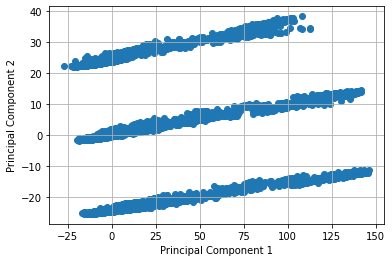

In [12]:
plot = plt.scatter(principal_components[:,0], principal_components[:,1])
plt.grid()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#does this suggest 3 distinct classes?